In [1]:
import os
os.environ["SPS_HOME"] = "/Users/fpetri/packages/fsps" 

In [2]:
import numpy as np

import lbg_forecast.sps as sps
import lbg_forecast.popmodel as pop
import lbg_forecast.sfh as sfh
import lbg_forecast.distributions as dstr
import lbg_forecast.hyperparams as hyp
import lbg_forecast.tools as tools

In [3]:
test_model = sps.initialise_sps_model()
test_model.libraries

(b'mist', b'miles', b'DL07')

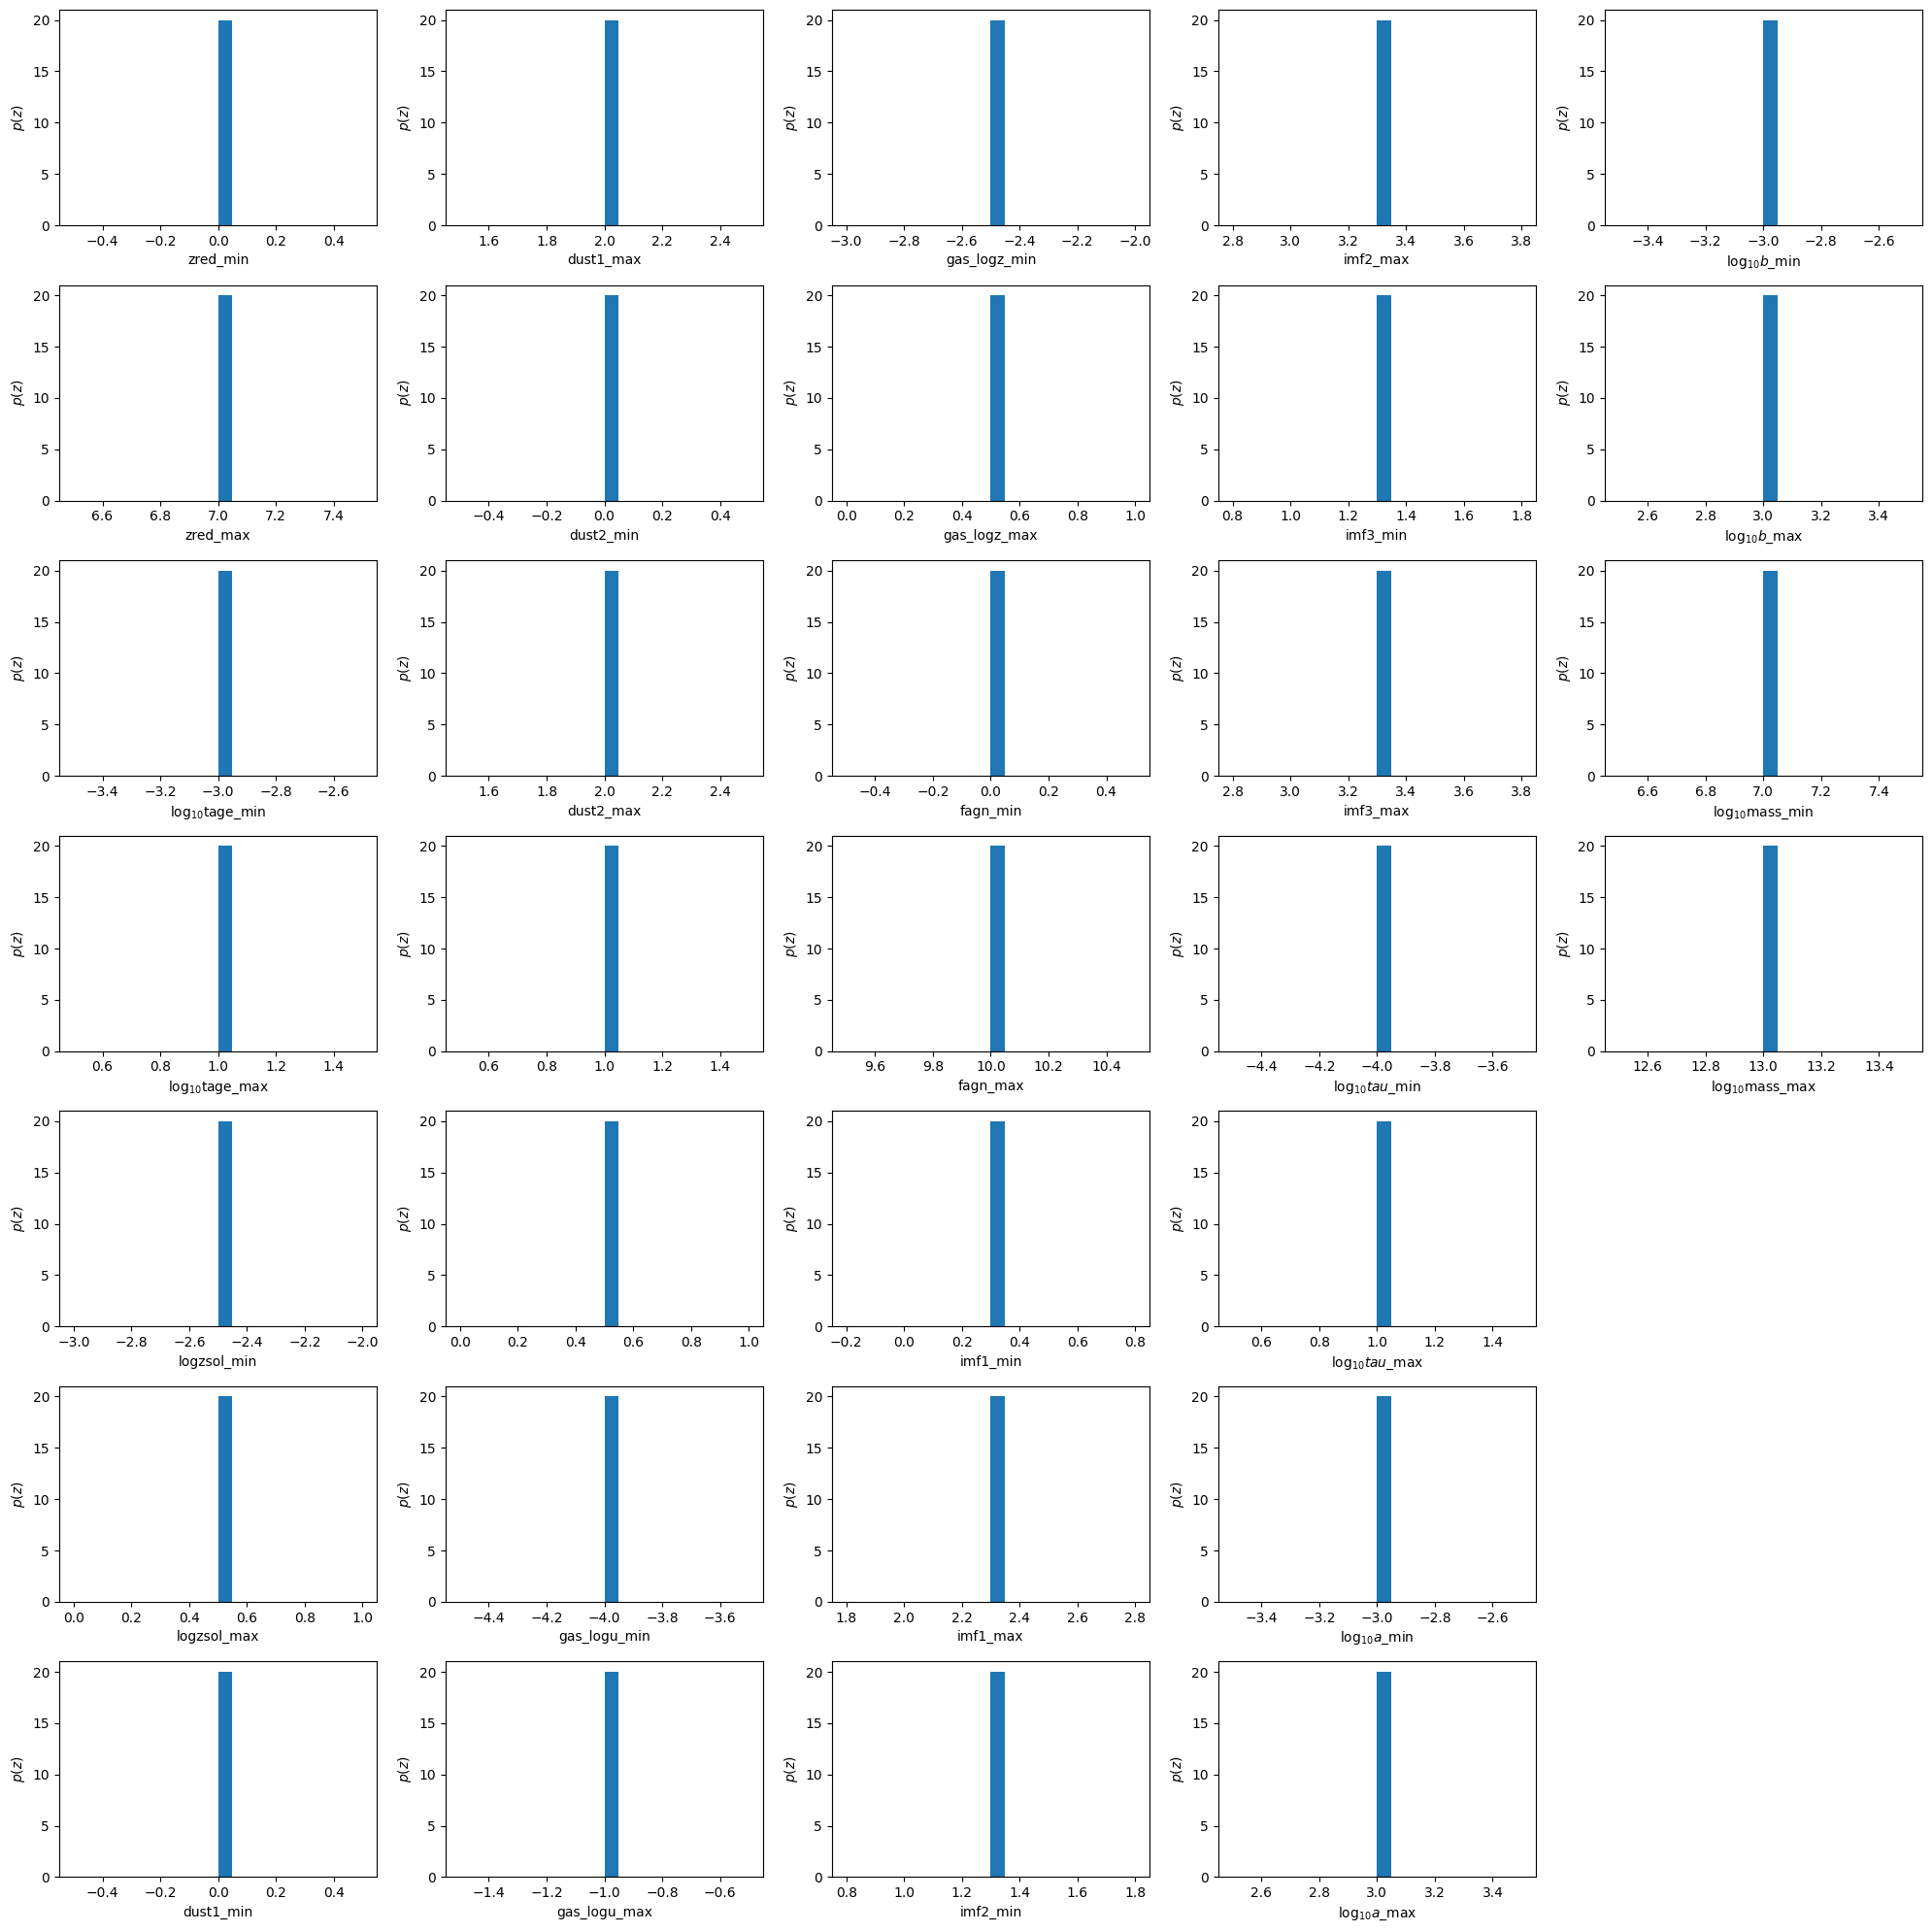

In [4]:
#uniform distribution for all
hyper_parameter_bounds = hyp.define_hyperparameter_bounds(
    zred = np.array([0, 0, 7]),
    logtage = np.array([0, -3, 1]),
    logzsol = np.array([0, -2.5, 0.5]),
    dust1 = np.array([0, 0, 2]),
    dust2 = np.array([0, 0, 2]),
    igm_factor = np.array([2, 0, 2]),
    gas_logu = np.array([0, -4, -1]),
    gas_logz = np.array([0, -2.5, 0.5]),
    fagn = np.array([0, 0, 10]),
    imf1 = np.array([0, 0.3, 2.3]), 
    imf2 = np.array([0, 1.3, 3.3]), 
    imf3 = np.array([0, 1.3, 3.3]), 
    logtau = np.array([0, -4, 1]),
    loga = np.array([0, -3, 3]),
    logb = np.array([0, -3, 3]),
    logmass = np.array([0, 7, 13])
)

hyperparameters = hyp.sample_hyper_parameters(hyper_parameter_bounds)
hyp.plot_hyperparameters(10000, hyper_parameter_bounds, rows=7, nbins=20)


In [5]:
data = tools.simulate_photometry(2, hyperparameters)
data

(array([[33.07111243, 27.41778534, 23.74477995, 21.62471071, 21.29501772,
         21.04735736],
        [46.38342843, 33.3457514 , 29.27914824, 25.85687065, 22.04728309,
         20.7567152 ]]),
 array([[ 4.53840672, -0.48774677, -0.66885566,  1.8322103 ,  1.40304803,
          1.35017401, -1.61874464, -0.21198513,  1.14691876,  1.83927716,
          2.27050147,  2.0530462 , -2.84434136, -0.39510754,  0.03698952,
         12.97083246],
        [ 6.26261226, -0.83969503, -2.11961244,  0.4323049 ,  0.40307196,
          1.73433976, -2.67472388, -1.29074309,  9.05763054,  2.09162517,
          1.83104643,  3.03831846, -1.57816387, -0.2862419 ,  1.11874508,
         12.17089183]]))

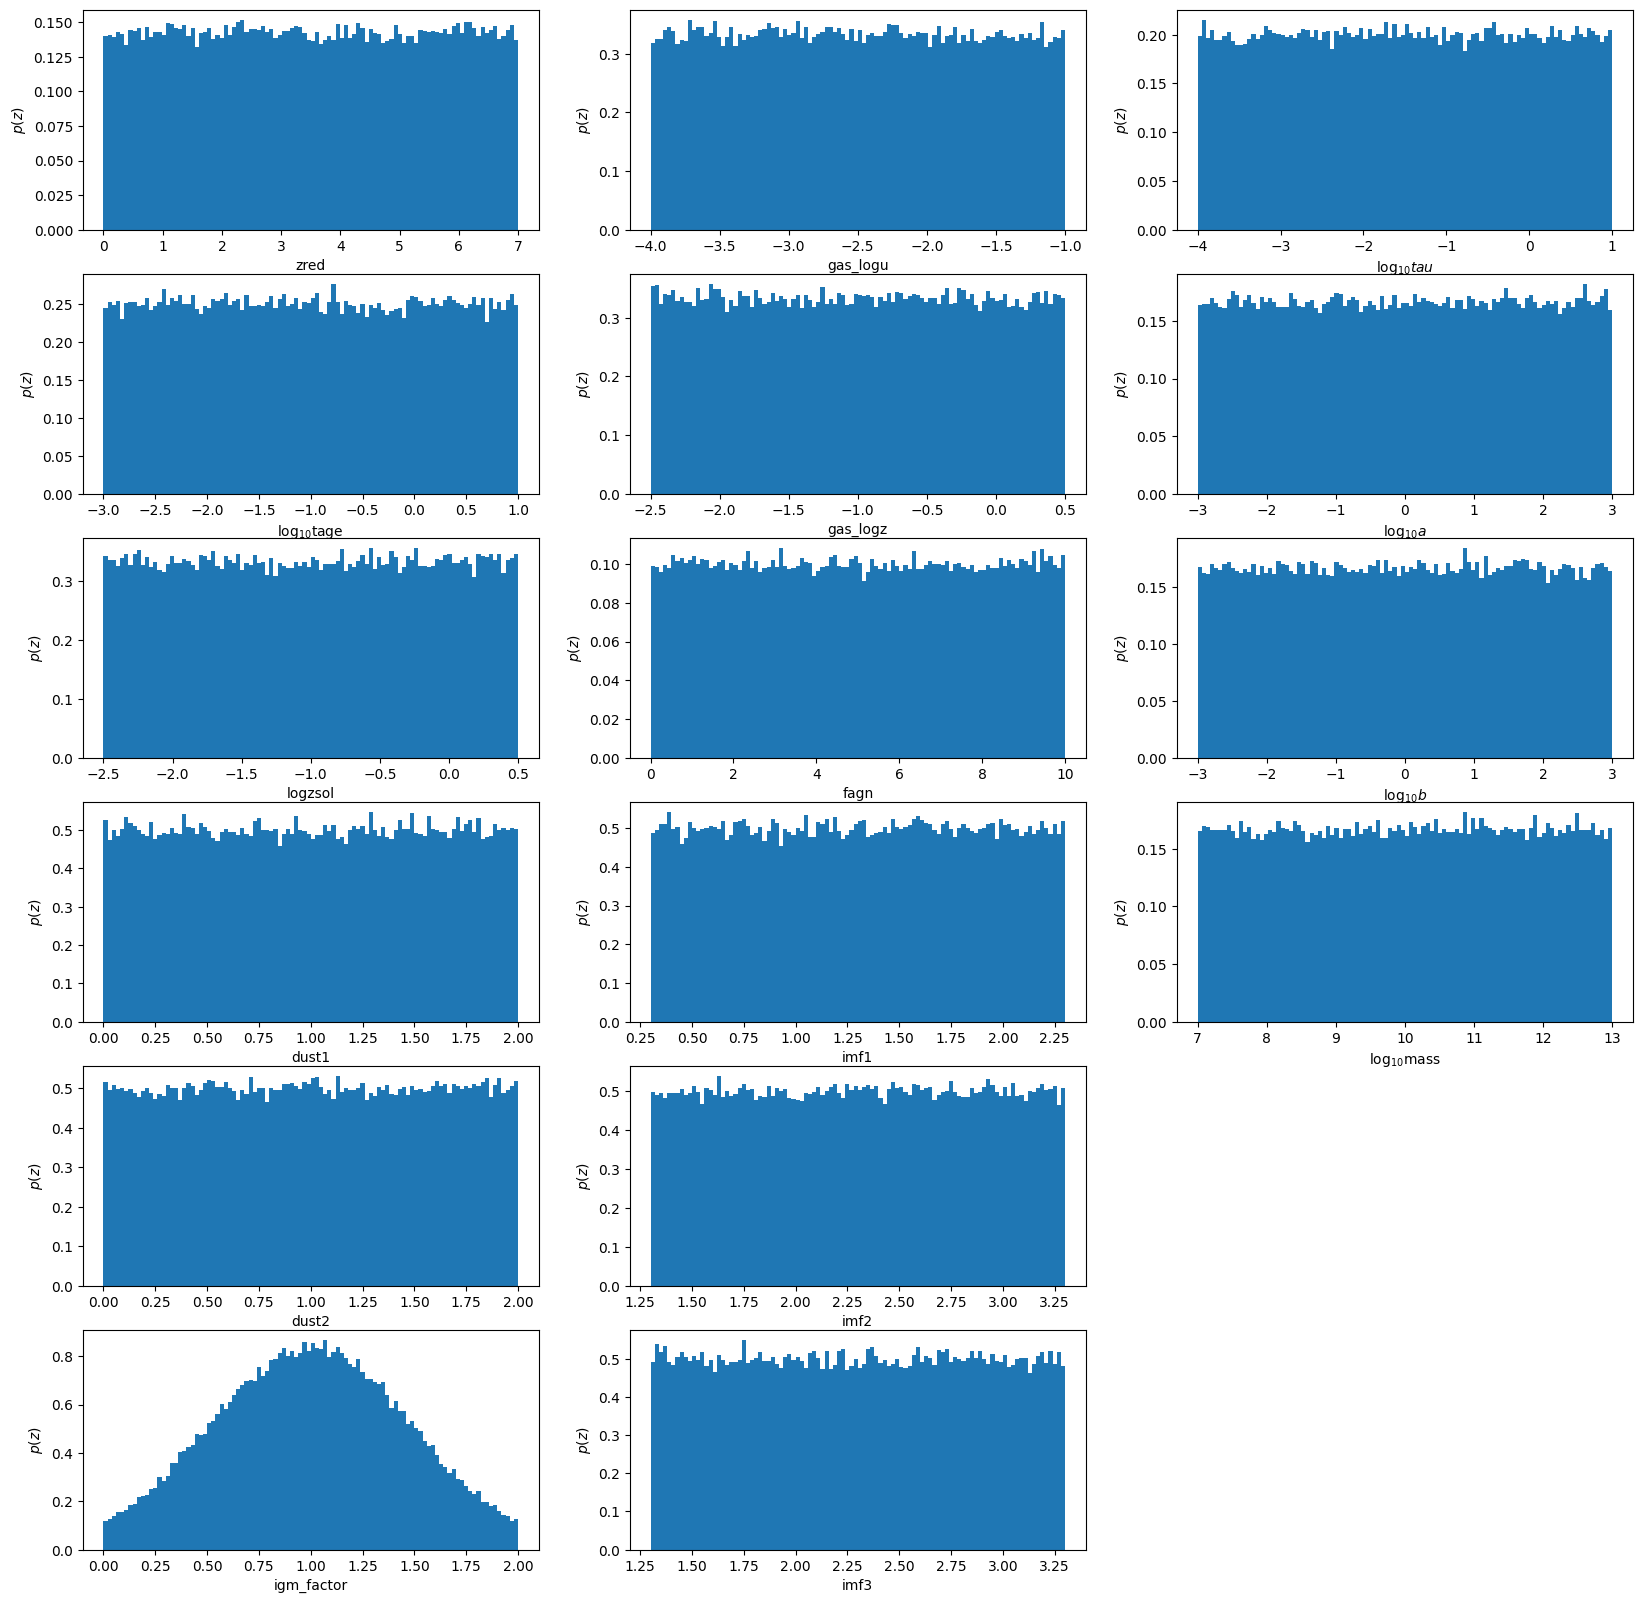

In [6]:
pop.plot_galaxy_population(100000, hparams=hyperparameters, rows=6, nbins=100)